<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-13/blob/main/Hw13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)).numpy() for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)).numpy() for img in x_test])
x_train = np.repeat(x_train, 3, axis=-1).astype(np.float32) / 255.
x_test = np.repeat(x_test, 3, axis=-1).astype(np.float32) / 255.

In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

base_model.trainable = False
model = models.Sequential([
    base_model,

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 645s 3s/step - accuracy: 0.6169 - loss: 1.0729 - val_accuracy: 0.8217 - val_loss: 0.4842
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 692s 3s/step - accuracy: 0.8162 - loss: 0.5139 - val_accuracy: 0.8433 - val_loss: 0.4281
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.8353 - loss: 0.4544 - val_accuracy: 0.8491 - val_loss: 0.4083
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.8461 - loss: 0.4212 - val_accuracy: 0.8537 - val_loss: 0.3898
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 686s 4s/step - accuracy: 0.8511 - loss: 0.4033 - val_accuracy: 0.8593 - val_loss: 0.3822
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 679s 3s/step - accuracy: 0.8568 - loss: 0.3897 - val_accuracy: 0.8611 - val_loss: 0.3740
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 651s 3s/step - accuracy: 0.8610 - loss: 0.3776 - val_accuracy: 0.8633 - val_loss: 0.3707
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 668s 3s/step - accuracy: 0.8632 - loss: 0.3721 - val_accu

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nТочність на тестових даних: {test_accuracy:.4f}")
print(f"Втрати на тестових даних: {test_loss:.4f}")


Точність на тестових даних: 0.8684
Втрати на тестових даних: 0.3632


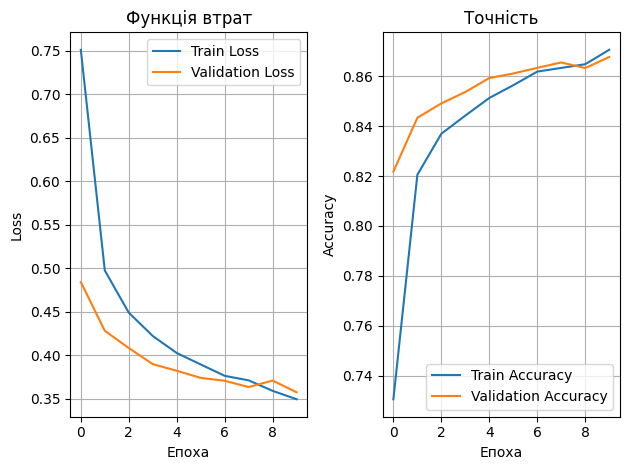

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.title('Функція втрат')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.title('Точність')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

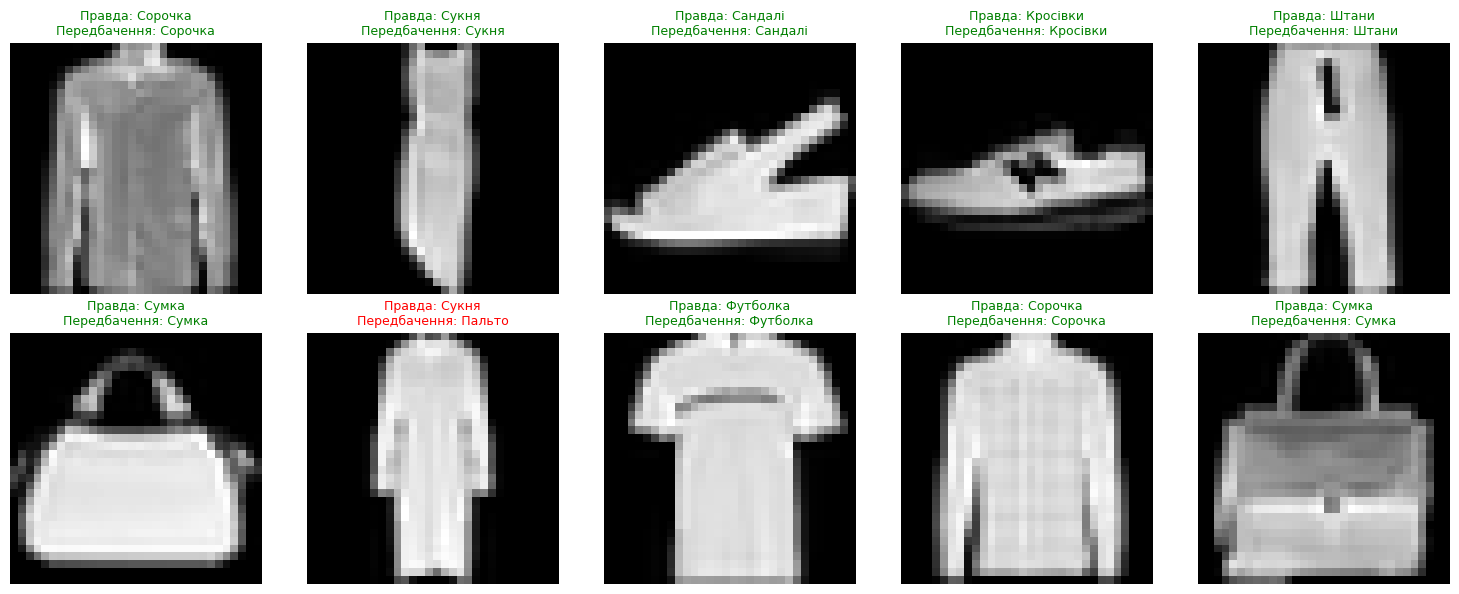


Висновок: Нейромережа правильно розпізнала 9 з 10 зображень (90% точність)


In [ ]:
class_names = ['Футболка', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

random_indices = random.sample(range(len(x_test)), 10)
predictions = model.predict(x_test[random_indices], verbose=0)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 6))
correct_count = 0

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    image = x_test[idx][:, :, 0]
    plt.imshow(image, cmap='gray')
    true_label = y_test[idx]
    predicted_label = pred_labels[i]
    is_correct = (true_label == predicted_label)
    if is_correct:
        correct_count += 1
        color = 'green'
    else:
        color = 'red'

    plt.title(f'Правда: {class_names[true_label]}\nПередбачення: {class_names[predicted_label]}',
              color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nВисновок: Нейромережа правильно розпізнала {correct_count} з 10 зображень ({correct_count*10}% точність)")